In [1]:
# in this notebook we will generate chart to display memory usage by different simulation scenarios
# scenario_no = [no linq fps, linq fps]
scenario_3 = [183.3, 212.2]
scenario_32 = [147.5, 136.5]
scenario_64 = [82.1, 77.5]
scenario_128 = [36.9, 32.6]
scenario_256 = [8.8, 9.3]
scenario_512 =  [2.2, 1.5]
scenario_1024 = [0.77, 0.56]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def generate_chart(scenario_numbers, total_memory_values, time_to_spawn_values, yLabel1, yLabel2, xlabel,title, bar_width=0.4, figsize=(7, 5), total_memory_color='b', time_to_spawn_color='r', grid_alpha=0.0,fontSize=8, yLim=None):
    # Create a single line chart for memory usage
    # Make it logarithmic
    fig, ax1 = plt.subplots(figsize=figsize)

    # Set the x-axis ticks to be the scenario numbers
    index = np.arange(len(scenario_numbers))

    # Plot total memory on the primary y-axis
    bars1 = ax1.bar(index, total_memory_values, bar_width, color=total_memory_color)
    if yLim is not None:
        ax1.set_ylim(0,yLim)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(yLabel1, color='black')
    ax1.tick_params(axis='y', colors='black')  # Set tick_params color to black
    ax1.set_xticks(index)
    ax1.set_xticklabels(scenario_numbers)
    ax1.set_title(title)

    # Display the memory usage as values on top of each bar
    for bar in bars1:
        yval = bar.get_height()
        #clamp yval to ylim if it is greater than yLim and yLim is not None
        if yLim is not None and yval > yLim:
            yval = yLim *0.96
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(bar.get_height(), 2), ha='center', va='bottom', color='black', fontsize=fontSize)

    # Set gridlines to black for the first subplot
    ax1.grid(True, linestyle='--', alpha=grid_alpha, color='black')

    # Create a second subplot for time to spawn
    ax2 = ax1.twinx()
    #ax2.set_ylim(0, np.max(time_to_spawn_values) * 1.1)
    if yLim is not None:
        ax2.set_ylim(0,yLim)
    # Plot time to spawn on the secondary y-axis
    bars2 = ax2.bar(index + bar_width, time_to_spawn_values, bar_width, color=time_to_spawn_color)
    ax2.set_ylabel(yLabel2, color='black')
    ax2.tick_params(axis='y', color='black')  # Set tick_params color to black

    # Display the time to spawn as values on top of each bar
    for bar in bars2:
        yval = bar.get_height()
        #clamp yval to ylim if it is greater than yLim and yLim is not None
        if yLim is not None and yval > yLim:
            yval = yLim *0.94
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(bar.get_height(),2), ha='center', va='bottom', color='black',fontsize=fontSize)

    # Set gridlines to black for the second subplot
    ax2.grid(True, linestyle='--', alpha=0, color='black')

    # Show the plot
    plt.show()


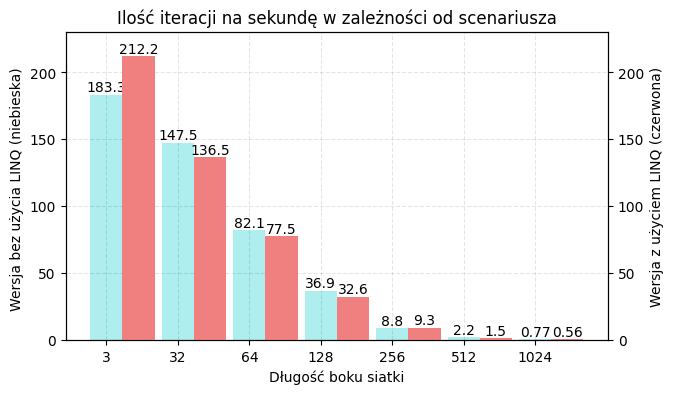

In [3]:
# since the texture memory and mesh memory does not change that much, we will only generate chart from total and time
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
n_groups = 7
scenario_no = [3, 32, 64, 128, 256, 512, 1024]
agent_count = [3*3, 32*32, 64*64, 128*128, 256*256, 512*512, 1024*1024]

# data to plot
n_groups = 7
fps_noLinq = [scenario_3[0], scenario_32[0], scenario_64[0], scenario_128[0], scenario_256[0], scenario_512[0], scenario_1024[0]]
fps_Linq = [scenario_3[1], scenario_32[1], scenario_64[1], scenario_128[1], scenario_256[1], scenario_512[1], scenario_1024[1]]

ms_per_frame_noLinq = [1000/fps for fps in fps_noLinq]
ms_per_frame_Linq = [1000/fps for fps in fps_Linq]

us_per_agent_noLinq = [ms_per_frame/(agent_count[i]/1000) for i,ms_per_frame in enumerate(ms_per_frame_noLinq)] 
us_per_agent_Linq = [ms_per_frame/(agent_count[i]/1000) for i,ms_per_frame in enumerate(ms_per_frame_Linq)]


generate_chart(scenario_no, fps_noLinq, fps_Linq, yLabel1='Wersja bez użycia LINQ (niebieska) ', yLabel2='Wersja z użyciem LINQ (czerwona)',xlabel='Długość boku siatki',title='Ilość iteracji na sekundę w zależności od scenariusza', bar_width=0.45, figsize=(7, 4), total_memory_color='paleturquoise', time_to_spawn_color='lightcoral', grid_alpha=0.1,fontSize=10,yLim=230)

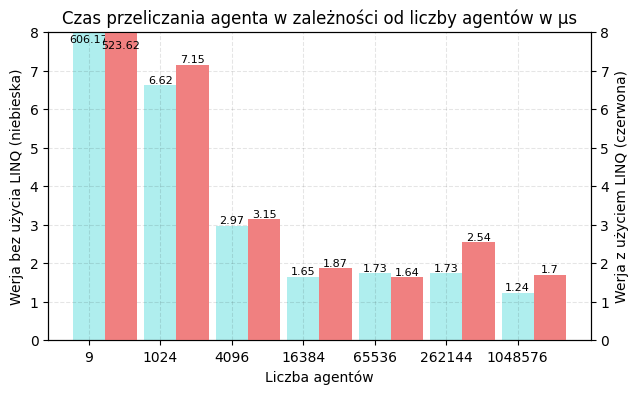

In [4]:
generate_chart(agent_count, us_per_agent_noLinq, us_per_agent_Linq, yLabel1='Werja bez użycia LINQ (niebieska)',yLabel2='Werja z użyciem LINQ (czerwona)',xlabel='Liczba agentów',title='Czas przeliczania agenta w zależności od liczby agentów w μs', bar_width=0.45, figsize=(7, 4), total_memory_color='paleturquoise', time_to_spawn_color='lightcoral', grid_alpha=0.1,fontSize=8,yLim=8)
